In [56]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sdt_path = ".."
if sdt_path not in sys.path:
    sys.path.insert(1, sdt_path)
    
from sdt import io, brightness

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%load_ext line_profiler

# from_raw_image

In [35]:
img = np.load(os.path.join("..", "tests", "daostorm_3d", "data_find", "bead_img.npz"))["img"]
local_max = np.load(os.path.join("..", "tests", "daostorm_3d", "data_find", "bead_finder.npz"))["local_max"]
local_max = pd.DataFrame(local_max[:, [1, 3]], columns=["x", "y"])

In [36]:
def make_loc(n=1):
    ret = []
    for i in range(n):
        l = local_max.copy()
        l["frame"] = i
        ret.append(l)
    return pd.concat(ret)

In [37]:
n = 10
loc = make_loc(n)
loc2 = make_loc(n)
frames = [img] * n

In [38]:
%timeit brightness.from_raw_image(loc, frames, 3, 2, engine="numba")

1.3 ms ± 247 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
%lprun -f brightness.from_raw_image brightness.from_raw_image(loc, frames, 3, 2, engine="numba")

Timer unit: 1e-06 s

Total time: 0.001697 s
File: ../sdt/brightness.py
Function: from_raw_image at line 156

Line #      Hits         Time  Per Hit   % Time  Line Contents
   156                                           def from_raw_image(positions, frames, radius, bg_frame=2, bg_estimator="mean",
   157                                                              pos_columns=pos_columns, engine="numba"):
   158                                               """Determine particle brightness by counting pixel values
   159                                           
   160                                               Around each localization, all brightness values in a  2*`radius` + 1 times
   161                                               square are added up. Additionally, background is locally determined by
   162                                               calculating the mean brightness in a frame of `bg_frame` pixels width
   163                                               a

In [39]:
%timeit brightness.from_raw_image(loc2, frames, 3, 2, engine="python")

36.4 ms ± 531 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [40]:
%lprun -f brightness.from_raw_image brightness.from_raw_image(loc2, frames, 3, 2, engine="python")

Timer unit: 1e-06 s

Total time: 0.080619 s
File: ../sdt/brightness.py
Function: from_raw_image at line 184

Line #      Hits         Time  Per Hit   % Time  Line Contents
   184                                           def from_raw_image(positions, frames, radius, bg_frame=2, bg_estimator="mean",
   185                                                              pos_columns=pos_columns, engine="numba"):
   186                                               """Determine particle brightness by counting pixel values
   187                                           
   188                                               Around each localization, all brightness values in a  2*`radius` + 1 times
   189                                               square are added up. Additionally, background is locally determined by
   190                                               calculating the mean brightness in a frame of `bg_frame` pixels width
   191                                               a

# Distribution

In [8]:
mass = np.random.normal(300, 150, 5000)
mass[mass <= 0] = 1

In [39]:
%timeit brightness.Distribution(mass, 1000, gauss_width=5, engine="python")

121 ms ± 3.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
%timeit brightness.Distribution(mass, 1000, gauss_width=5, engine="numba")

98.6 ms ± 5.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
%lprun -f brightness.Distribution.__init__ brightness.Distribution(mass, 1000, gauss_width=5, engine="numba")

Timer unit: 1e-06 s

Total time: 0.053805 s
File: ../sdt/brightness.py
Function: __init__ at line 329

Line #      Hits         Time  Per Hit   % Time  Line Contents
   329                                               def __init__(self, data, abscissa, smooth=2., cam_eff=1., gauss_width=5,
   330                                                            engine="numba"):
   331                                                   """Parameters
   332                                                   ----------
   333                                                   data : list of pandas.DataFrame or pandas.DataFrame or numpy.ndarray
   334                                                       If a DataFrame is given, extract the masses from the "mass" column.
   335                                                       A list of DataFrames will be concatenated. Brightness values can
   336                                                       also be passed as an one-dimensional ndarray

In [28]:
%lprun -f brightness.Distribution.__init__ brightness.Distribution(mass, 1000, gauss_width=np.inf)

Timer unit: 1e-06 s

Total time: 0.18335 s
File: ../sdt/brightness.py
Function: __init__ at line 301

Line #      Hits         Time  Per Hit   % Time  Line Contents
   301                                               def __init__(self, data, abscissa, smooth=2., cam_eff=1., gauss_width=5):
   302                                                   """Parameters
   303                                                   ----------
   304                                                   data : list of pandas.DataFrame or pandas.DataFrame or numpy.ndarray
   305                                                       If a DataFrame is given, extract the masses from the "mass" column.
   306                                                       A list of DataFrames will be concatenated. Brightness values can
   307                                                       also be passed as an one-dimensional ndarray.
   308                                                   abscissa : numpy.ndarray

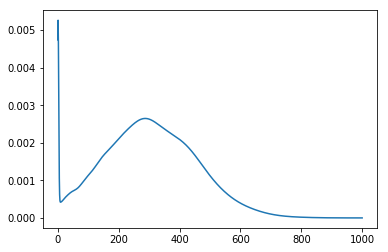

In [57]:
d = brightness.Distribution(mass, 1000, gauss_width=5, engine="numba")
d.plot()

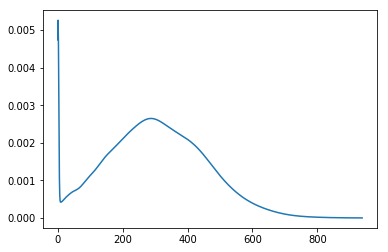

In [62]:
d = brightness.Distribution(mass, gauss_width=5, engine="numba")
d.plot()

In [60]:
d.graph[1][-1]

3.5754527946003939e-06

In [65]:
s = pd.Series(np.arange(1000))
lst = [s.copy() for i in range(100)]

In [66]:
%timeit pd.concat(lst).values

1.57 ms ± 75.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [67]:
%timeit np.concatenate([l.values for l in lst])

97.3 µs ± 1.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
